In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/train_tweets.csv')

In [ ]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [ ]:
data.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2


In [ ]:
data.shape

(29625, 14)

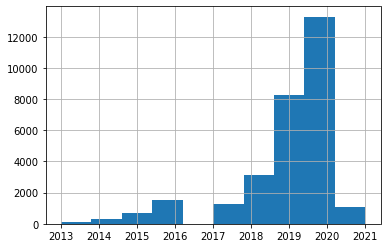

In [ ]:
data.tweet_created_at_year.hist()

In [ ]:
data.tweet_created_at_year.value_counts()

2020    13288
2019     8234
2018     3137
2016     1549
2017     1239
2021     1058
2015      711
2014      325
2013       84
Name: tweet_created_at_year, dtype: int64

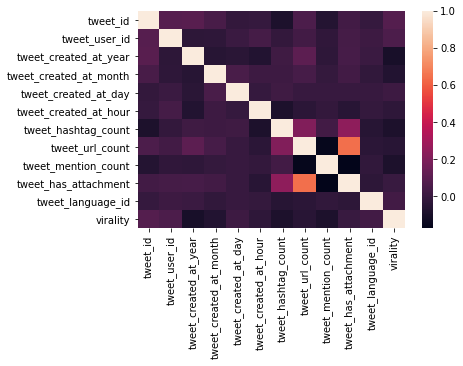

In [ ]:

sns.heatmap(data.corr())

In [ ]:
data.tweet_language_id.value_counts(normalize=1)*100

0     97.127426
3      1.448101
6      0.536709
1      0.280169
8      0.077637
4      0.074262
7      0.057384
18     0.037131
23     0.033755
5      0.033755
11     0.030380
10     0.030380
9      0.030380
19     0.030380
21     0.023629
2      0.023629
15     0.020253
13     0.016878
20     0.013502
27     0.013502
22     0.010127
24     0.010127
28     0.006751
30     0.006751
17     0.006751
16     0.006751
12     0.003376
29     0.003376
25     0.003376
14     0.003376
Name: tweet_language_id, dtype: float64

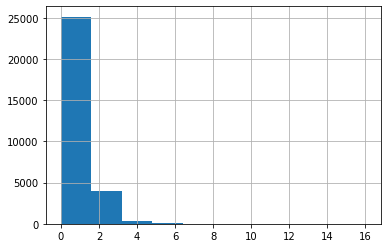

In [ ]:
data.tweet_mention_count.hist()

In [ ]:
data.tweet_mention_count.value_counts()

0.0     17550
1.0      7602
2.0      3051
3.0       917
4.0       293
5.0        90
6.0        48
7.0        27
8.0        24
9.0        10
10.0        4
13.0        3
11.0        2
16.0        2
14.0        1
15.0        1
Name: tweet_mention_count, dtype: int64

In [ ]:
data.tweet_hashtag_count.value_counts()

0.0     11435
1.0      9682
2.0      5312
3.0      2285
4.0       650
5.0       167
6.0        64
7.0        18
8.0         4
9.0         3
11.0        2
14.0        2
10.0        1
Name: tweet_hashtag_count, dtype: int64

In [ ]:
data.tweet_url_count.value_counts()

1.0    11780
2.0     8798
0.0     7210
3.0      949
4.0      562
5.0      319
6.0        6
8.0        1
Name: tweet_url_count, dtype: int64

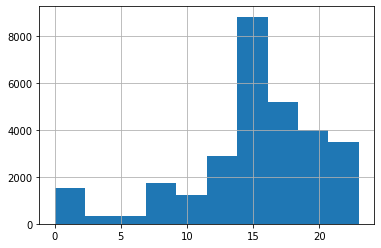

In [ ]:
data.tweet_created_at_hour.hist()

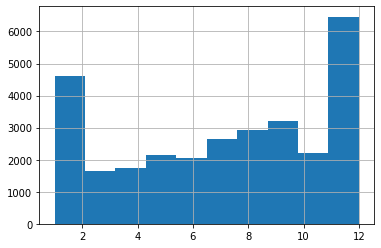

In [ ]:
data.tweet_created_at_month.hist()

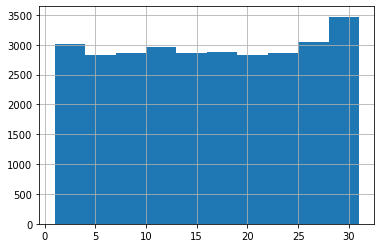

In [ ]:
data.tweet_created_at_day.hist()

In [ ]:
users = pd. read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Users/users.csv')

In [ ]:
users.head()

,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,0,1164,48720,70469,5956,True,14122,True,0,2010,8
1,1,3914,85361,2171,5943,False,6957,False,0,2011,9
2,2,8292,200944,1416,8379,True,83485,True,0,2011,6
3,3,1770,15385,4572,1866,True,12265,True,0,2011,8
4,4,15311,459083,1021,7368,False,121193,False,0,2011,6


In [ ]:
users.shape

(52, 11)

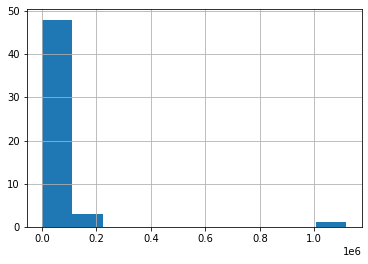

In [ ]:
users.user_following_count.hist()

In [ ]:
users.user_following_count.value_counts()

1021       1
42363      1
1345       1
5694       1
825        1
181304     1
4572       1
7472       1
6191       1
174        1
1322       1
529        1
2083       1
5791       1
211356     1
11290      1
60124      1
1118149    1
11157      1
136081     1
13         1
1416       1
8838       1
2          1
2817       1
324        1
70469      1
88915      1
11994      1
41015      1
370        1
43888      1
1557       1
2534       1
39642      1
558        1
2398       1
3226       1
5340       1
11865      1
1991       1
2352       1
726        1
758        1
1235       1
2171       1
584        1
1488       1
331        1
31178      1
2888       1
0          1
Name: user_following_count, dtype: int64

In [ ]:
(users.user_followers_count[users.user_following_count != 0] / users.user_following_count[users.user_following_count != 0])

0          0.691368
1         39.318747
2        141.909605
3          3.365048
4        449.640548
5          2.537840
6         17.194796
7        195.187146
8         14.895217
9          2.929072
10        15.389561
11         6.200349
12        28.301818
13         1.073746
14       363.347645
15        60.712963
16        53.962810
17         3.708378
18        29.878136
19         0.819306
20        32.195951
21         4.048217
22        16.521848
23        35.212647
25        10.301500
26         2.639403
27        14.592052
28     71769.230769
29         2.418213
30    793891.500000
31        39.469141
32        13.593414
33      1265.059459
34         2.942336
35      3023.800604
36         4.773446
37        26.168138
38        22.847349
39       364.829815
40         4.020037
41         0.462894
42         2.429738
43         4.080324
44         0.947177
45         0.920912
46         1.080941
47      6018.833333
48         9.855491
49        31.657792
50       765.599315


Creating BaseLine Model

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/train_tweets.csv')
test = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/test_tweets.csv')
y = train.pop('virality')

In [ ]:
test.tweet_topic_ids = test.fillna('[]').tweet_topic_ids.apply(eval)
train.tweet_topic_ids = train.fillna('[]').tweet_topic_ids.apply(eval)
topics = set(to_1D(test.tweet_topic_ids).unique().tolist()+to_1D(train.tweet_topic_ids).unique().tolist())
train_topics_bool = boolean_df(train['tweet_topic_ids'], topics)
test_topics_bool = boolean_df(test['tweet_topic_ids'], topics)
test = pd.concat([test, test_topics_bool],axis=1)
train = pd.concat([train, train_topics_bool], axis=1)

test['tweet_topic_count'] = test.tweet_topic_ids.apply(len)
train['tweet_topic_count'] = train.tweet_topic_ids.apply(len)

train.drop(columns='tweet_topic_ids', inplace=True)
test.drop(columns='tweet_topic_ids',inplace=True)

test.tweet_attachment_class = test.tweet_attachment_class.map({'A':1,'B':2,'C':3})
train.tweet_attachment_class = train.tweet_attachment_class.map({'A':1,'B':2,'C':3})

In [ ]:
train['tweet_created_at_date'] = pd.to_datetime(train.tweet_created_at_year*10000+train.tweet_created_at_month*100+train.tweet_created_at_day,format='%Y%m%d').dt.dayofweek
test['tweet_created_at_date'] = pd.to_datetime(test.tweet_created_at_year*10000+test.tweet_created_at_month*100+test.tweet_created_at_day,format='%Y%m%d').dt.dayofweek

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Users/users.csv')

In [ ]:
train = pd.concat([train,pd.DataFrame(columns=users.columns)])
test = pd.concat([test,pd.DataFrame(columns=users.columns)])
for i in range(train.shape[0]):
  train.loc[i,'user_id':'user_created_at_month'] = users[users.user_id==train.tweet_user_id[i]].iloc[0]
for i in range(test.shape[0]):
  test.loc[i,'user_id':'user_created_at_month'] = users[users.user_id==test.tweet_user_id[i]].iloc[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=1904)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20737, 84)
(8888, 84)
(20737,)
(8888,)


In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.677992799279928


In [ ]:
clf2 = RandomForestClassifier(n_estimators=1200,max_depth=25, min_samples_leaf=1, min_samples_split=10)
clf2.fit(X_train,y_train)
print(clf2.score(X_train,y_train))
print(clf2.score(X_test,y_test))

0.8380672228384047
0.68001800180018


In [ ]:
clf2.fit(train,y)
print(clf2.score(train,y))

0.8430042194092827


In [ ]:
sol = test.tweet_id.to_frame()
sol['virality'] = clf2.predict(test)
sol.astype(int).to_csv('sol12.csv',index=False)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print(cross_val_score(clf,X_train, y_train).mean())
print(cross_val_score(clf,X_test, y_test).mean())

0.6703000554129475
0.6516654185812593


In [ ]:
imp = pd.Series(clf.feature_importances_, index=X_train.columns)

In [ ]:
imp=imp*100

In [ ]:
imp.shape

(73,)

In [ ]:
imp.nlargest(30)

tweet_id                  13.755277
tweet_created_at_day       8.767853
tweet_created_at_hour      8.146320
tweet_created_at_month     6.716489
tweet_created_at_date      5.934966
user_followers_count       4.762168
tweet_topic_count          4.542588
user_listed_on_count       3.881777
tweet_hashtag_count        3.860338
tweet_url_count            3.479575
tweet_mention_count        3.454708
tweet_created_at_year      2.804380
user_following_count       2.751994
user_like_count            2.570399
user_tweet_count           2.260617
tweet_user_id              2.223653
user_created_at_month      1.966037
user_id                    1.964573
user_created_at_year       1.805702
user_has_location          1.612323
tweet_attachment_class     1.272351
tweet_has_attachment       1.142645
100                        0.779314
78                         0.686317
99                         0.670178
98                         0.655289
43                         0.643771
tweet_language_id          0

In [ ]:
imp.nlargest(20)

tweet_id                  17.979817
tweet_user_id             11.196958
tweet_created_at_day       9.617950
tweet_created_at_hour      9.233093
tweet_created_at_month     7.513311
tweet_created_at_date      6.424770
tweet_topic_count          5.772986
tweet_created_at_year      4.786115
tweet_hashtag_count        4.369920
tweet_url_count            3.984152
tweet_mention_count        3.579643
78                         1.208318
tweet_attachment_class     1.172987
100                        1.158713
98                         1.065710
99                         1.052140
tweet_has_attachment       0.991043
43                         0.767900
tweet_language_id          0.665332
81                         0.664609
dtype: float64

In [ ]:
imp.nlargest(15)

tweet_id                  19.907649
tweet_user_id             11.670139
tweet_created_at_day      10.993629
tweet_created_at_hour     10.183597
tweet_created_at_month     8.245243
tweet_topic_count          5.874427
tweet_created_at_year      4.932830
tweet_hashtag_count        4.580083
tweet_url_count            4.288950
tweet_mention_count        3.737644
100                        1.216269
tweet_attachment_class     1.147051
78                         1.109952
98                         1.086943
99                         1.041776
dtype: float64

In [ ]:
imp.nsmallest(20)

38     0.000000
123    0.000000
117    0.000000
165    0.001128
101    0.001924
155    0.002007
71     0.005104
52     0.005389
172    0.006027
126    0.007397
170    0.011589
72     0.012338
122    0.013143
125    0.015165
127    0.016213
171    0.016662
149    0.020036
82     0.020750
169    0.023810
150    0.025686
dtype: float64

In [ ]:
imp.sum()

100.0

In [ ]:
train

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,127,36,78,149,52,73,88,165,38,101,61,39,99,169,112,126,71,72,153,121,151,171,80,111,148,152,89,163,45,125,120,79,59,81,44,63,150,170,147,82,93,155,91,58,87,37,119,122,43,104,100,123,60,118,117,98,68,156,172,tweet_topic_count
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,3,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,12
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,3,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,9
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,11
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,8
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29620,24846,4,2019,8,30,17,0.0,1.0,0.0,True,1,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,9
29621,7320,21,2018,12,21,13,2.0,1.0,0.0,True,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,3
29622,7447,21,2018,9,29,18,0.0,1.0,0.0,True,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,3
29623,26737,41,2017,2,5,16,0.0,2.0,0.0,True,1,0,False,False,False,False,Fal